# YOLOv8 Object Detection, Instance Segmentation, and Classification

This notebooks runs inference using the latest YOLOv8 model from Ultralytics. We run inference for three different tasks:
* Object detection
* Instance segmentation
* Image classification

This is the accompanying notebook for the [Ultralytics YOLOv8: State-of-the-Art YOLO Models](https://learnopencv.com/ultralytics-yolov8/) article.

In [1]:
import matplotlib.pyplot as plt
import os
import glob
import requests
import zipfile

## Download Data

In [2]:
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)
        
download_file(
    'https://www.dropbox.com/s/zqgucpnbp6c1uyw/images.zip?dl=1',
    'images.zip'
)

In [3]:
# Unzip the data file
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

unzip('images.zip')

Extracted all


## Install Ultralytics Package

In [4]:
!pip install ultralytics

## Object Detection

In [5]:
!yolo task=detect mode=predict model=yolov8x.pt source='images' name=yolov8x_det

Ultralytics YOLOv8.0.0 🚀 Python-3.9.15 torch-1.12.0+cu116 CUDA:0 (NVIDIA GeForce GTX 1060, 6078MiB)
100%|████████████████████████████████████████| 131M/131M [00:12<00:00, 11.2MB/s]

Fusing layers... 
YOLOv8x summary: 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs
image 1/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/20230111_Ultralytics_YOLOv8_State_of_the_Art_YOLO_Models/notebooks/images/2008_000183.jpg: 640x352 1 dog, 59.9ms
image 2/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/20230111_Ultralytics_YOLOv8_State_of_the_Art_YOLO_Models/notebooks/images/2008_000562.jpg: 480x640 2 persons, 1 bicycle, 1 car, 2 backpacks, 68.5ms
image 3/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/20230111_Ultralytics_YOLOv8_State_of_the_Art_YOLO_Models/notebooks/images/2008_000880.jpg: 448x640 9 persons, 1 car, 1 truck, 3 horses, 65.8ms
image 4/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/2023

In [6]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

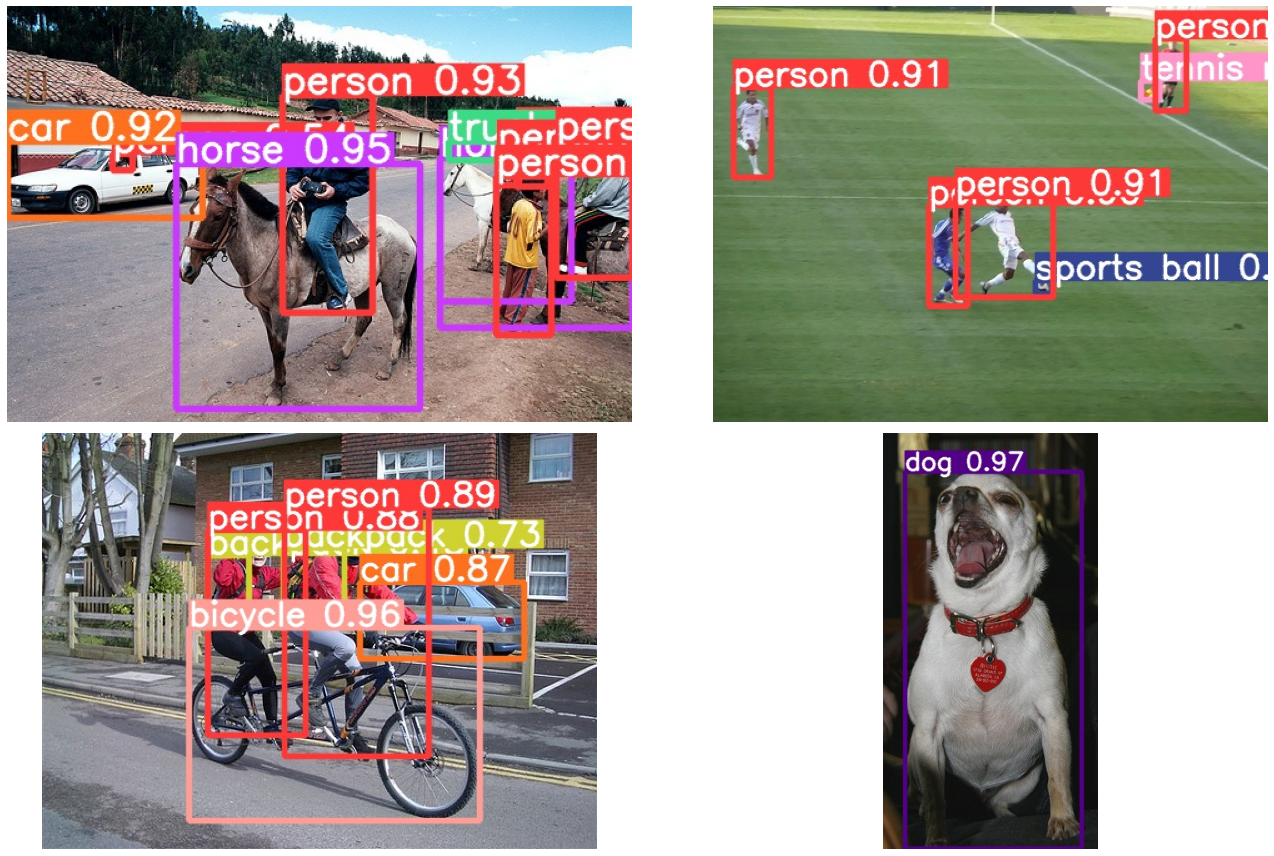

In [7]:
visualize('runs/detect/yolov8x_det/')

## Instance Segmentation

In [8]:
!yolo task=segment mode=predict model=yolov8x-seg.pt source='images' name=yolov8x_seg

Ultralytics YOLOv8.0.0 🚀 Python-3.9.15 torch-1.12.0+cu116 CUDA:0 (NVIDIA GeForce GTX 1060, 6078MiB)
100%|████████████████████████████████████████| 137M/137M [00:11<00:00, 12.2MB/s]

Fusing layers... 
YOLOv8x-seg summary: 295 layers, 71797696 parameters, 0 gradients, 344.1 GFLOPs
image 1/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/20230111_Ultralytics_YOLOv8_State_of_the_Art_YOLO_Models/notebooks/images/2008_000183.jpg: 640x352 1 dog, 71.8ms
image 2/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/20230111_Ultralytics_YOLOv8_State_of_the_Art_YOLO_Models/notebooks/images/2008_000562.jpg: 480x640 2 persons, 1 bicycle, 1 car, 1 backpack, 83.2ms
image 3/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/20230111_Ultralytics_YOLOv8_State_of_the_Art_YOLO_Models/notebooks/images/2008_000880.jpg: 448x640 8 persons, 2 cars, 1 truck, 2 horses, 1 cell phone, 78.2ms
image 4/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vi

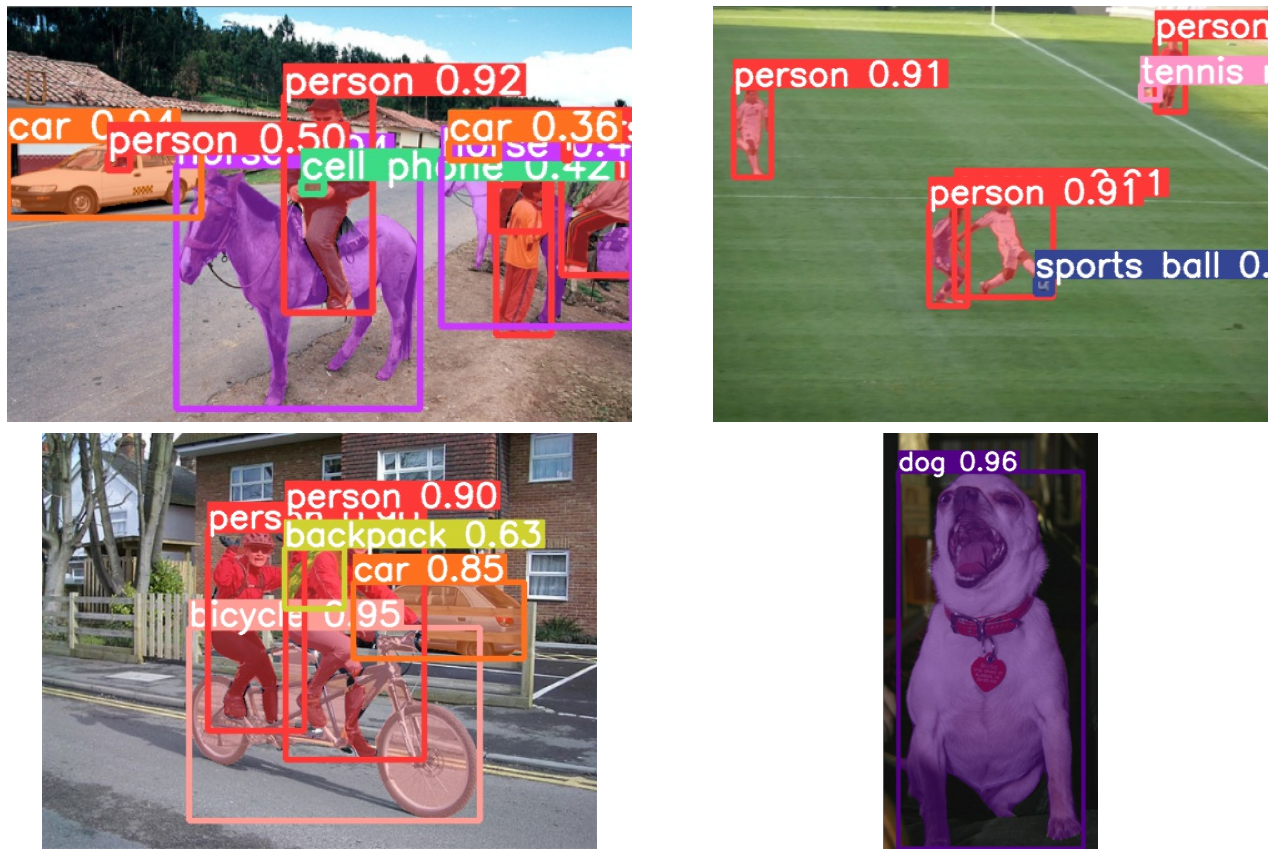

In [9]:
visualize('runs/segment/yolov8x_seg/')

## Image Classification

In [10]:
!yolo task=classify mode=predict model=yolov8x-cls.pt source='images' name=yolov8x_cls

Ultralytics YOLOv8.0.0 🚀 Python-3.9.15 torch-1.12.0+cu116 CUDA:0 (NVIDIA GeForce GTX 1060, 6078MiB)
100%|████████████████████████████████████████| 110M/110M [00:20<00:00, 5.52MB/s]

Fusing layers... 
YOLOv8x-cls summary: 133 layers, 57404200 parameters, 0 gradients, 154.8 GFLOPs
image 1/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/20230111_Ultralytics_YOLOv8_State_of_the_Art_YOLO_Models/notebooks/images/2008_000183.jpg: 640x352 n03733805 156.01, n02013706 148.71, n01776313 131.88, n13054560 125.36, n03017168 123.02, 37.7ms
image 2/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/20230111_Ultralytics_YOLOv8_State_of_the_Art_YOLO_Models/notebooks/images/2008_000562.jpg: 480x640 n02988304 239.76, n01776313 231.49, n03272010 229.39, n02013706 212.05, n03733805 205.09, 44.3ms
image 3/4 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/20230111_Ultralytics_YOLOv8_State_of_the_Art_YOLO_Models/notebooks/images/2008_000880.jpg: 

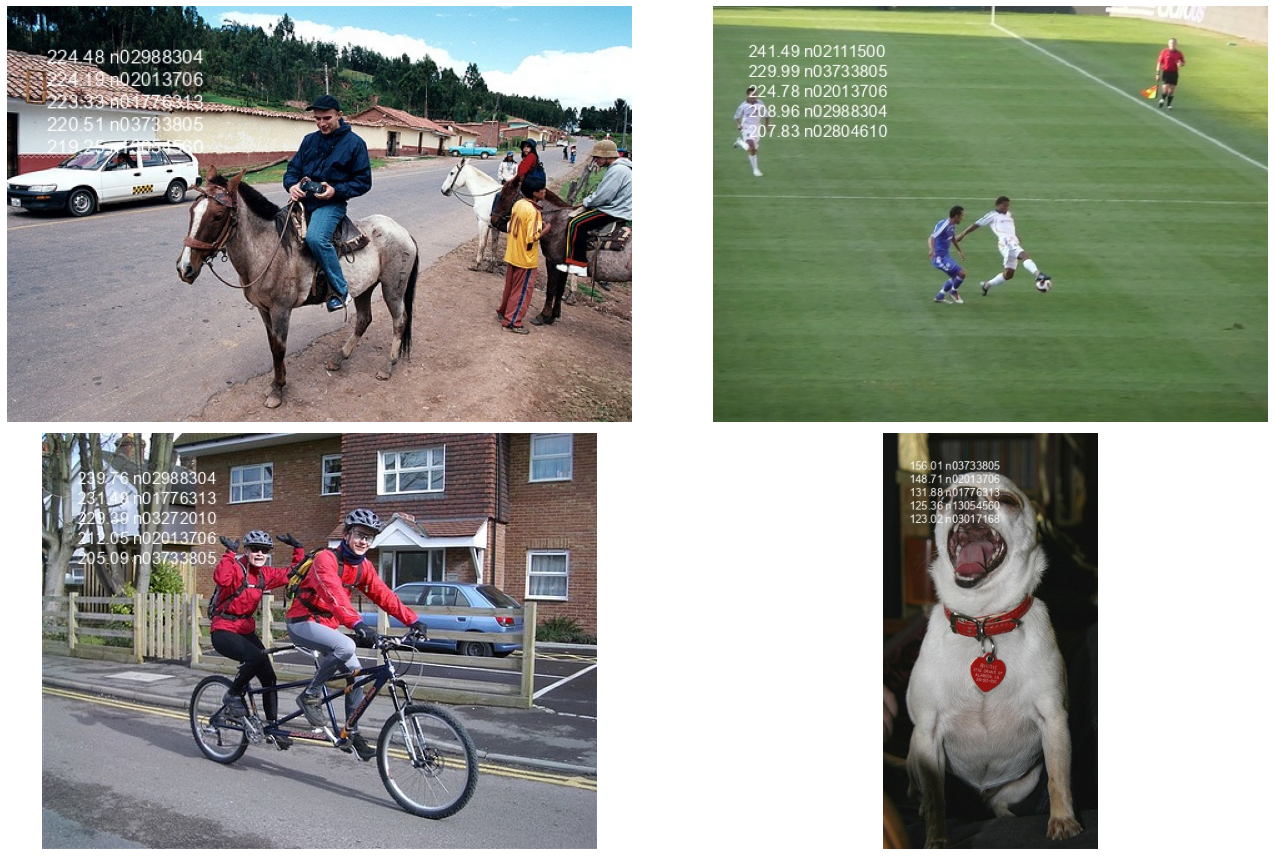

In [11]:
visualize('runs/classify/yolov8x_cls/')